# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
#validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
# with open(validation_file, mode='rb') as f:
#     valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
# X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Here we make the validation set by using 20% of the training set using sklearn

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 27839
Number of testing examples = 12630
Number of validation examples = 6960
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### A sample of each class of images is visualized

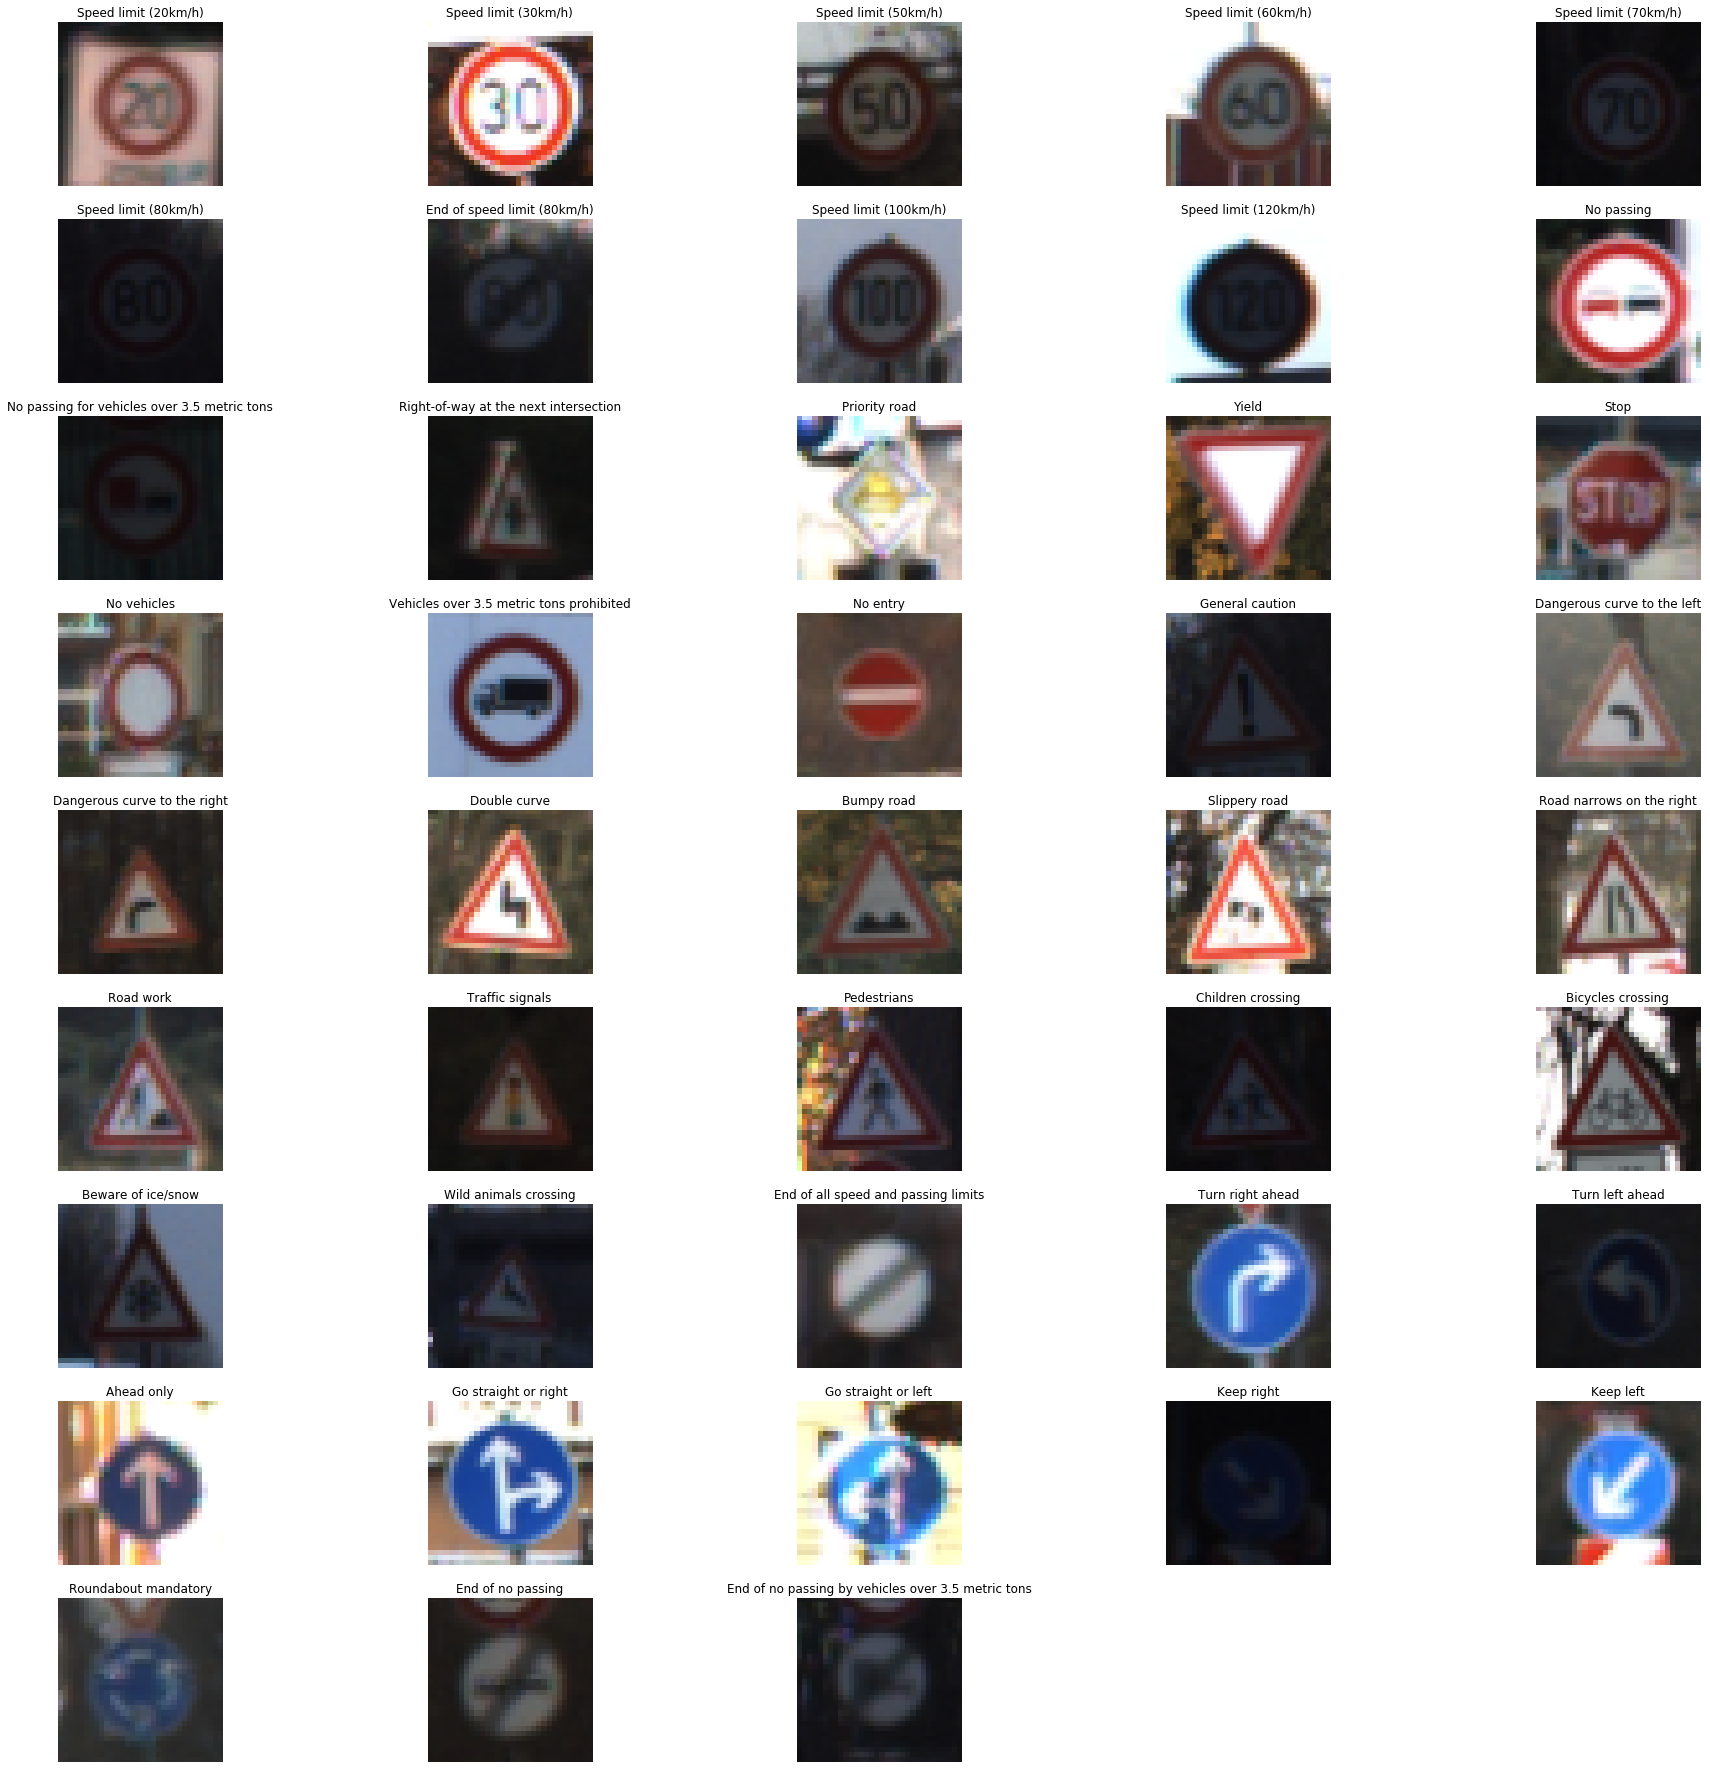

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import csv
# Visualizations will be shown in the notebook.
csv_file='./signnames.csv'
signName=[]
with open(csv_file) as f:
    readFile = csv.reader(f, delimiter=',')
    print (readFile)
    for row in readFile:
        signName.append(row[1])
classLen = []        
plt.figure(figsize=(32, 32))
for sign in range(0,n_classes):
    plt.subplot(9, 5, sign+1)
    image = X_train[y_train == sign]
    classLen.append(len(image))
    plt.imshow(image[0, :, :, :])
    plt.title(signName[sign+1])
    plt.axis('off')
plt.show()

### Plot the graph of differnt classes of signs vs the total number of images per each sign.

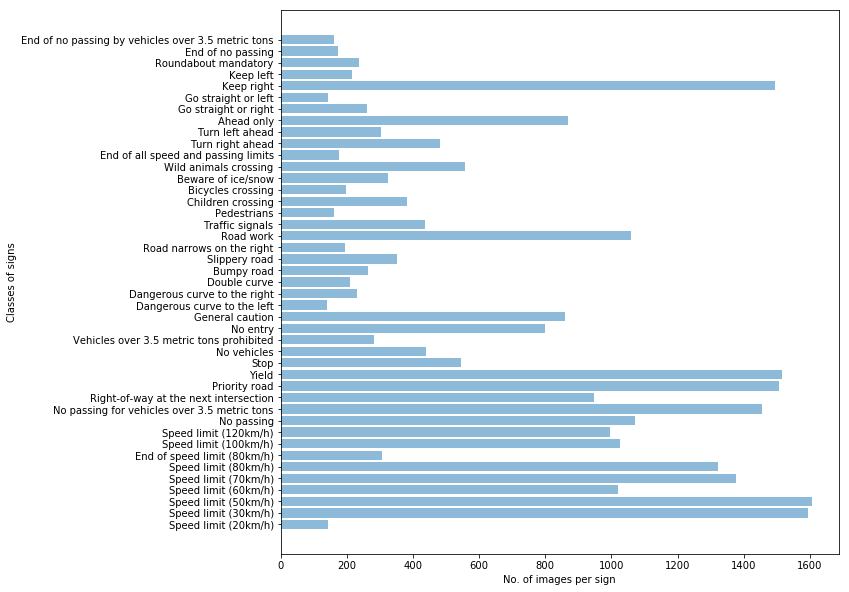

In [5]:
plt.figure(figsize=(10, 10))
plt.barh(range(1,44),classLen,align='center',alpha=0.5, linewidth=2)
plt.yticks(range(1,44), signName[1:44])
plt.ylabel('Classes of signs')
plt.xlabel('No. of images per sign')
plt.draw()
plt.show()
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Preprocessing normalizes the image and then coverts it to gray scale for training, validation and test sets.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
def normalizeImg(images):
    normalized=[]
    for i in range(0, len(images)):
        # normailizes image
        normalizedImg=((images[i].astype(np.float32)-128)/128)
        #converts the normaized image to 
        normalized.append(cv2.cvtColor(cv2.cvtColor(normalizedImg, cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB))
    plt.title('Normalized image')
    plt.imshow(normalized[2],cmap='gray')
    return normalized

### Schuffle the training data set and normalize the sets

(32, 32, 3)


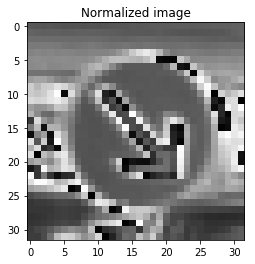

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_train = normalizeImg(X_train)
print (X_train[0].shape)
X_valid = normalizeImg(X_valid)
X_test = normalizeImg(X_test)

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

In [9]:
### Implementing LeNet architecture 

In [10]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    input1 = x
    filter_weights = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6),mean = mu, stddev = sigma))
    filter_bias = tf.Variable(tf.zeros(6))
    strides=[1,1,1,1]
    padding = 'VALID'
    conv = tf.nn.conv2d(input1, filter_weights, strides, padding) + filter_bias

    # TODO: Activation.
    conv1 = tf.nn.relu(conv)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    input2=conv
    filter_slope = [1,2,2,1]
    strides2=[1,2,2,1]
    padding2='VALID'
    pool1 = tf.nn.max_pool(input2, filter_slope, strides2, padding2,name='convpool1')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    input3 = pool1
    filter_weights2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16),mean = mu, stddev = sigma))
    filter_bias2 = tf.Variable(tf.zeros(16))
    strides2=[1,1,1,1]
    padding2 = 'VALID'
    conv2 = tf.nn.conv2d(input3, filter_weights2, strides2, padding2) + filter_bias2
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    input3=conv3
    filter_slope2=[1,2,2,1]
    strides3=[1,2,2,1]
    padding3='VALID'
    pool2 = tf.nn.max_pool(input3, filter_slope2, strides3, padding3, name='convpool2')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flatten = tf.contrib.layers.flatten(pool2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    input4=flatten
    n_features = 400
    n_labels = 120
    weights = tf.Variable(tf.truncated_normal(shape=(n_features, n_labels),mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(n_labels))
    out1 = tf.add(tf.matmul(input4, weights), bias)
    
    # TODO: Activation and Dropout = 0.5 for training and 1.0 for testing.
    conv4 = tf.nn.relu(out1)
    conv4 = tf.nn.dropout(conv4, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    input5 = conv4
    n_features2 = 120
    n_labels2 = 84
    weights2 = tf.Variable(tf.truncated_normal((n_features2, n_labels2), mean = mu, stddev = sigma))
    bias2 = tf.Variable(tf.zeros(n_labels2))
    out2 = tf.add(tf.matmul(input5, weights2), bias2)
    
    
    # TODO: Activation and Dropout = 0.5 for training and 1.0 for testing.
    conv5 = tf.nn.relu(out2)
    conv5 = tf.nn.dropout(conv5, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    input6 = conv5
    n_features3 = 84
    n_labels3 = 43
    weights3 = tf.Variable(tf.truncated_normal((n_features3, n_labels3)))
    bias3 = tf.Variable(tf.zeros(n_labels3))
    out2 = tf.add(tf.matmul(input6, weights3), bias3)
    
    logits = out2    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### One hot encoding and defining the cross entropy, optimizer  and training operation

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [13]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training the model using Training and Validation Data sets

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        
    
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    saver.save(sess, './Trafficlenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.468
EPOCH 2 ...
Training Accuracy = 0.664
EPOCH 3 ...
Training Accuracy = 0.794
EPOCH 4 ...
Training Accuracy = 0.854
EPOCH 5 ...
Training Accuracy = 0.891
EPOCH 6 ...
Training Accuracy = 0.929
EPOCH 7 ...
Training Accuracy = 0.945
EPOCH 8 ...
Training Accuracy = 0.954
EPOCH 9 ...
Training Accuracy = 0.962
EPOCH 10 ...
Training Accuracy = 0.972
EPOCH 11 ...
Training Accuracy = 0.971
EPOCH 12 ...
Training Accuracy = 0.974
EPOCH 13 ...
Training Accuracy = 0.980
EPOCH 14 ...
Training Accuracy = 0.980
EPOCH 15 ...
Training Accuracy = 0.983
EPOCH 16 ...
Training Accuracy = 0.984
EPOCH 17 ...
Training Accuracy = 0.987
EPOCH 18 ...
Training Accuracy = 0.987
EPOCH 19 ...
Training Accuracy = 0.989
EPOCH 20 ...
Training Accuracy = 0.990
EPOCH 21 ...
Training Accuracy = 0.989
EPOCH 22 ...
Training Accuracy = 0.987
EPOCH 23 ...
Training Accuracy = 0.992
EPOCH 24 ...
Training Accuracy = 0.989
EPOCH 25 ...
Training Accuracy = 0.993
EPOCH 26 ...
Training

### Test images data set and its Testing Accuracy

In [16]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('Trafficlenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    testing_accuracy = evaluate(X_train, y_train)
    print("Testing Accuracy = {:.3f}".format(testing_accuracy))

Testing Accuracy = 0.997


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

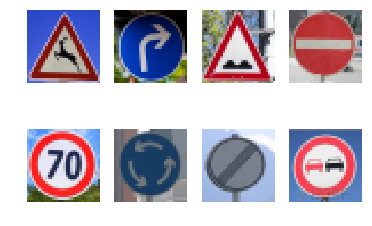

(32, 32, 3)
2


In [18]:
import os
X_final=[]
y_final = []

for nameOfImg in os.listdir("german_traffic_signs/"):
    fullpath= "german_traffic_signs/"+ nameOfImg
    y_final.append(int(nameOfImg.split('.')[0]))
    img=plt.imread(fullpath)
    X_final.append(img)
for i in range(len(X_final)):
    X_final[i]=cv2.resize(X_final[i],(32, 32), interpolation = cv2.INTER_AREA)
    plt.subplot(2, 4,i+1)
    plt.axis('off')
    plt.imshow(X_final[i])
plt.show()

print (X_final[0].shape) 
print (y_train[0])

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

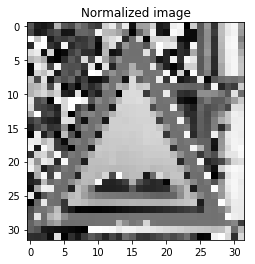

In [20]:
X_final=normalizeImg(X_final)

### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('Trafficlenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    private_images_accuracy = evaluate(X_final, y_final)
    print("\nEight images were used from the web to run on the trained network and its accuracy was computed")
    print("Accuracy = {:.3f}%".format(private_images_accuracy*100))
    


Eight images were used from the web to run on the trained network and its accuracy was computed
Accuracy = 75.000%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

-------------------------------------Image 1 -----------------------------------------
Original Image :  31 --> Wild animals crossing
Predicted Image :  31 --> Wild animals crossing
Prediction : Correct

Predicted sign - Wild animals crossing has softmax value of : 0.982642
Predicted sign - Double curve has softmax value of : 0.0173582
Predicted sign - Dangerous curve to the left has softmax value of : 4.52317e-09
Predicted sign - Beware of ice/snow has softmax value of : 2.17211e-09
Predicted sign - Road work has softmax value of : 8.23196e-10


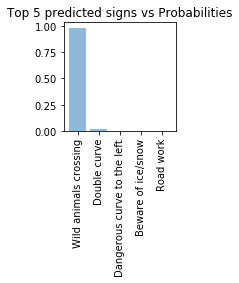

-------------------------------------Image 2 -----------------------------------------
Original Image :  33 --> Turn right ahead
Predicted Image :  33 --> Turn right ahead
Prediction : Correct

Predicted sign - Turn right ahead has softmax value of : 1.0
Predicted sign - Keep left has softmax value of : 5.12191e-14
Predicted sign - Road work has softmax value of : 5.68246e-17
Predicted sign - Yield has softmax value of : 3.89655e-18
Predicted sign - No vehicles has softmax value of : 2.23253e-19


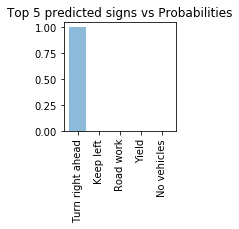

-------------------------------------Image 3 -----------------------------------------
Original Image :  22 --> Bumpy road
Predicted Image :  29 --> Bicycles crossing
Prediction : Incorrect

Predicted sign - Bicycles crossing has softmax value of : 0.981169
Predicted sign - Bumpy road has softmax value of : 0.0188306
Predicted sign - Road narrows on the right has softmax value of : 1.4071e-08
Predicted sign - Road work has softmax value of : 1.05104e-08
Predicted sign - Dangerous curve to the right has softmax value of : 1.1224e-09


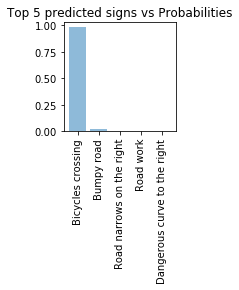

-------------------------------------Image 4 -----------------------------------------
Original Image :  17 --> No entry
Predicted Image :  17 --> No entry
Prediction : Correct

Predicted sign - No entry has softmax value of : 1.0
Predicted sign - Stop has softmax value of : 3.78947e-08
Predicted sign - Turn left ahead has softmax value of : 6.60696e-10
Predicted sign - Go straight or right has softmax value of : 9.6328e-12
Predicted sign - Speed limit (50km/h) has softmax value of : 1.16565e-12


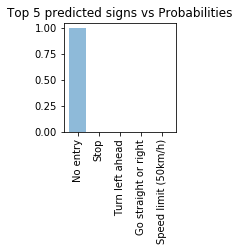

-------------------------------------Image 5 -----------------------------------------
Original Image :  4 --> Speed limit (70km/h)
Predicted Image :  3 --> Speed limit (60km/h)
Prediction : Incorrect

Predicted sign - Speed limit (60km/h) has softmax value of : 0.613092
Predicted sign - Speed limit (30km/h) has softmax value of : 0.293872
Predicted sign - Speed limit (20km/h) has softmax value of : 0.0905951
Predicted sign - Speed limit (70km/h) has softmax value of : 0.00121073
Predicted sign - Speed limit (80km/h) has softmax value of : 0.00104799


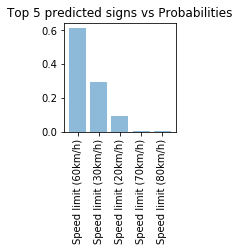

-------------------------------------Image 6 -----------------------------------------
Original Image :  40 --> Roundabout mandatory
Predicted Image :  40 --> Roundabout mandatory
Prediction : Correct

Predicted sign - Roundabout mandatory has softmax value of : 0.8612
Predicted sign - Priority road has softmax value of : 0.0797245
Predicted sign - No vehicles has softmax value of : 0.0198578
Predicted sign - End of all speed and passing limits has softmax value of : 0.0143912
Predicted sign - Children crossing has softmax value of : 0.00771206


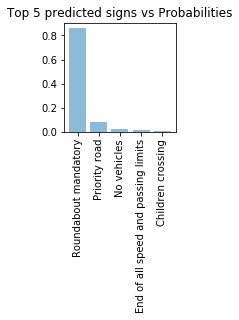

-------------------------------------Image 7 -----------------------------------------
Original Image :  32 --> End of all speed and passing limits
Predicted Image :  32 --> End of all speed and passing limits
Prediction : Correct

Predicted sign - End of all speed and passing limits has softmax value of : 0.583831
Predicted sign - Roundabout mandatory has softmax value of : 0.14663
Predicted sign - Speed limit (30km/h) has softmax value of : 0.0869744
Predicted sign - Priority road has softmax value of : 0.0412247
Predicted sign - Speed limit (20km/h) has softmax value of : 0.0290405


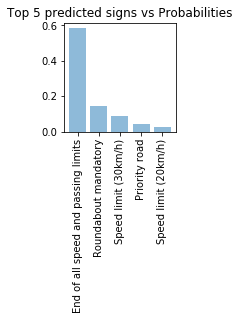

-------------------------------------Image 8 -----------------------------------------
Original Image :  9 --> No passing
Predicted Image :  9 --> No passing
Prediction : Correct

Predicted sign - No passing has softmax value of : 1.0
Predicted sign - Vehicles over 3.5 metric tons prohibited has softmax value of : 9.13357e-14
Predicted sign - Ahead only has softmax value of : 1.54971e-17
Predicted sign - No vehicles has softmax value of : 5.79898e-18
Predicted sign - Yield has softmax value of : 8.26395e-19


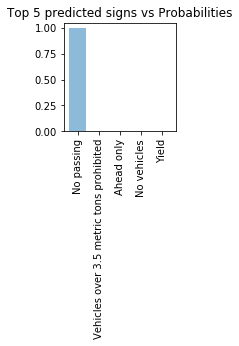

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('Trafficlenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    softmax = tf.nn.softmax(logits)
    probs = sess.run(softmax, feed_dict={x: X_final, y: y_final, keep_prob : 1})
    top5 = sess.run(tf.nn.top_k(tf.constant(probs), k=5))
    
for pred in range(0,len(y_final)):
    print ('-------------------------------------Image', pred+1,'-----------------------------------------')
    print ('Original Image : ',y_final[pred],'-->',signName[y_final[pred]+1])
    print ('Predicted Image : ',top5[1][pred][0],'-->',signName[top5[1][pred][0]+1])
    if (y_final[pred]!=top5[1][pred][0]):
        print('Prediction : Incorrect')
    else:
        print('Prediction : Correct')

    imgCls=[]
    print()
    for i in range(0, len(top5[0][0])):
        imgCls.append(signName[top5[1][pred][i]+1])
        print('Predicted sign -',signName[top5[1][pred][i]+1],'has softmax value of :', top5[0][pred][i])
 
    
    plt.figure(figsize=(2, 2))
    plt.bar(range(1,6),top5[0][pred],align='center',alpha=0.5, linewidth=2)
    plt.xticks(range(1,6), imgCls,rotation=90)
#     plt.ylabel('Top 5 sign images')
#     plt.xlabel('Probability')
    plt.title('Top 5 predicted signs vs Probabilities')
    plt.show()
    %matplotlib inline


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [24]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

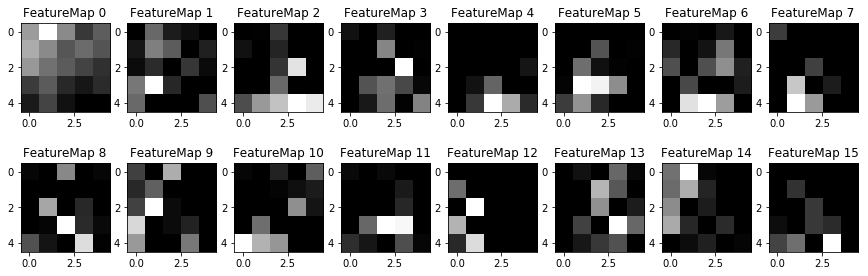

In [27]:
keep_prob = tf.placeholder(tf.float32) 
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('Trafficlenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    firstLayer = sess.graph.get_tensor_by_name('convpool1:0')
    outputFeatureMap(X_final,firstLayer)
    secondLayer = sess.graph.get_tensor_by_name('convpool2:0')
    outputFeatureMap(X_final,secondLayer)